In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [82]:
dataset = pd.read_csv('mushrooms.csv')

In [83]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [84]:
dataset.shape

(8124, 23)

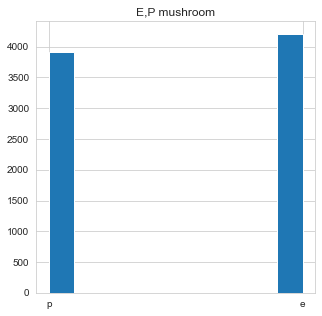

In [86]:
plt.hist(dataset['class'])
plt.title('E,P mushroom')
plt.show()

In [5]:
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
features = dataset.drop('class', axis=1)
target = dataset['class']

In [7]:
# 훈련, 테스트 셋을 나눠줍시다.
train_features, test_feauters, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=1)

In [8]:
train_features.shape, train_target.shape, test_feauters.shape, test_target.shape

((6499, 22), (6499,), (1625, 22), (1625,))

In [9]:
train = pd.concat([train_features , train_target], axis=1)

In [10]:
# 훈련이 잘 될지 target 벨런스를 봅시다. 한쪽으로 너무 치우쳐 있다면 under/over sampling 의 필요성이 생김
train['class'].value_counts()

e    3388
p    3111
Name: class, dtype: int64

In [11]:
def plot_feature_scatter(df1, df2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(4,4,figsize=(14,14))

    for feature in features:
        i += 1
        plt.subplot(4,4,i)
        plt.scatter(df1[feature], df2[feature], marker='+')
        plt.xlabel(feature, fontsize=9)
    plt.show();

In [12]:
import seaborn as sns

In [97]:
train_features.columns[1]

'cap-surface'

# 분포도 확인

In [107]:
def ValueDistribution(ds1, ds2):
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(6,6, figsize=(25,25))

    for i in range(len(ds1.columns)):
        plt.subplot(5,5,i+1)
        ds1 = ds1.sort_values(by=[train_features.columns[i]], axis=0) # sort_values 를 사용한 이유 plt.hist 경우 x축의 value 순서는 먼저 나온 순으로 배열된다.
        ds2 = ds2.sort_values(by=[train_features.columns[i]], axis=0) # 그렇기 때문에 그래프를 만들기 전에 재정렬을 해주자. 그래야 다른 그래프와 비교할 때 효율적이다.
        a = ds1[ds1.columns[i]]
        b = ds2[ds2.columns[i]]
        plt.title(ds1.columns[i])
        plt.hist(a, alpha=0.5 , label = 'train')
        plt.hist(b, alpha=0.5 , color = 'red', label = 'test')

In [95]:
train['cap-color'].value_counts()

n    1831
g    1485
e    1197
y     852
w     822
b     131
p     116
c      38
r      14
u      13
Name: cap-color, dtype: int64

<Figure size 360x360 with 0 Axes>

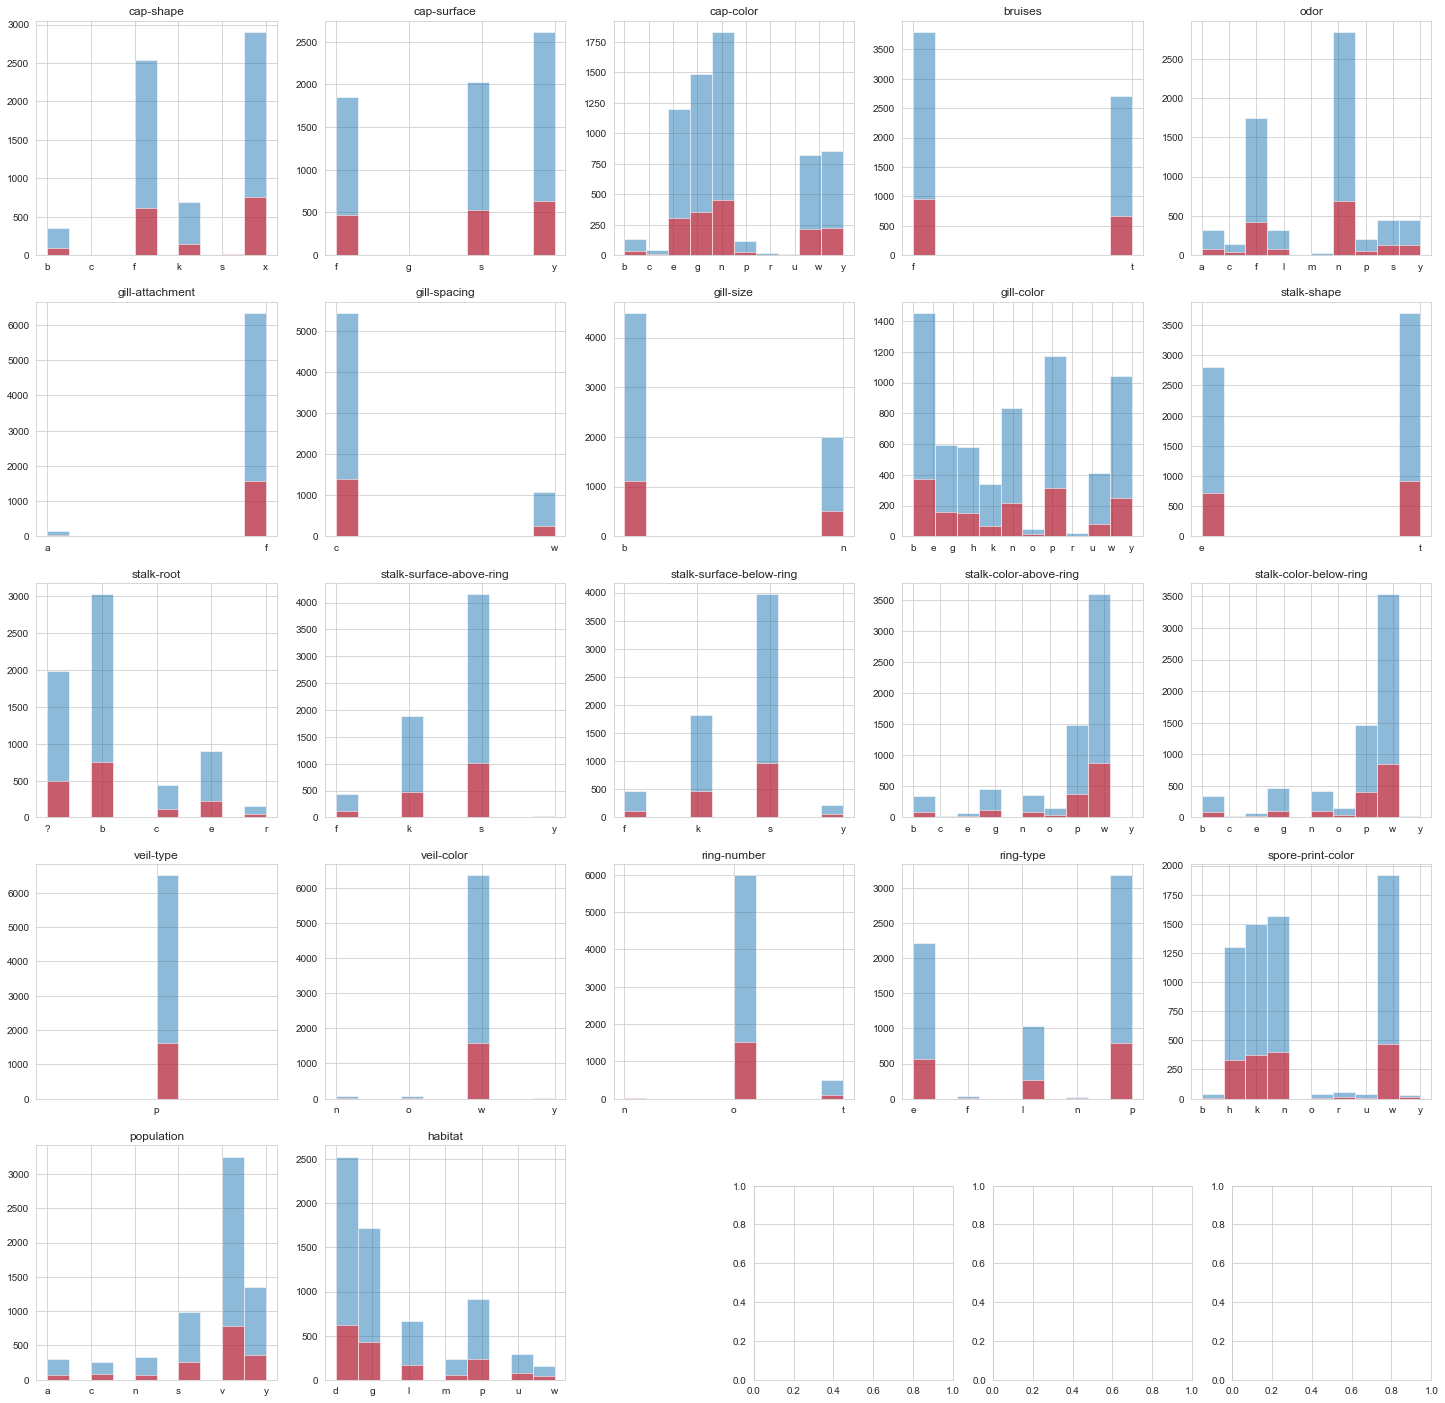

In [106]:
ValueDistribution(train_features, test_feauters)

# 2. feautres & class 상관성

In [78]:
grouped = pd.crosstab(train_features.iloc[:,0],train['class'])
grouped

class,e,p
cap-shape,,
b,318,36
c,0,2
f,1299,1235
k,192,493
s,20,0
x,1559,1345


In [79]:
grouped['p']/(grouped['e'] + grouped['p'])

cap-shape
b    0.101695
c    1.000000
f    0.487372
k    0.719708
s    0.000000
x    0.463154
dtype: float64

<Figure size 360x360 with 0 Axes>

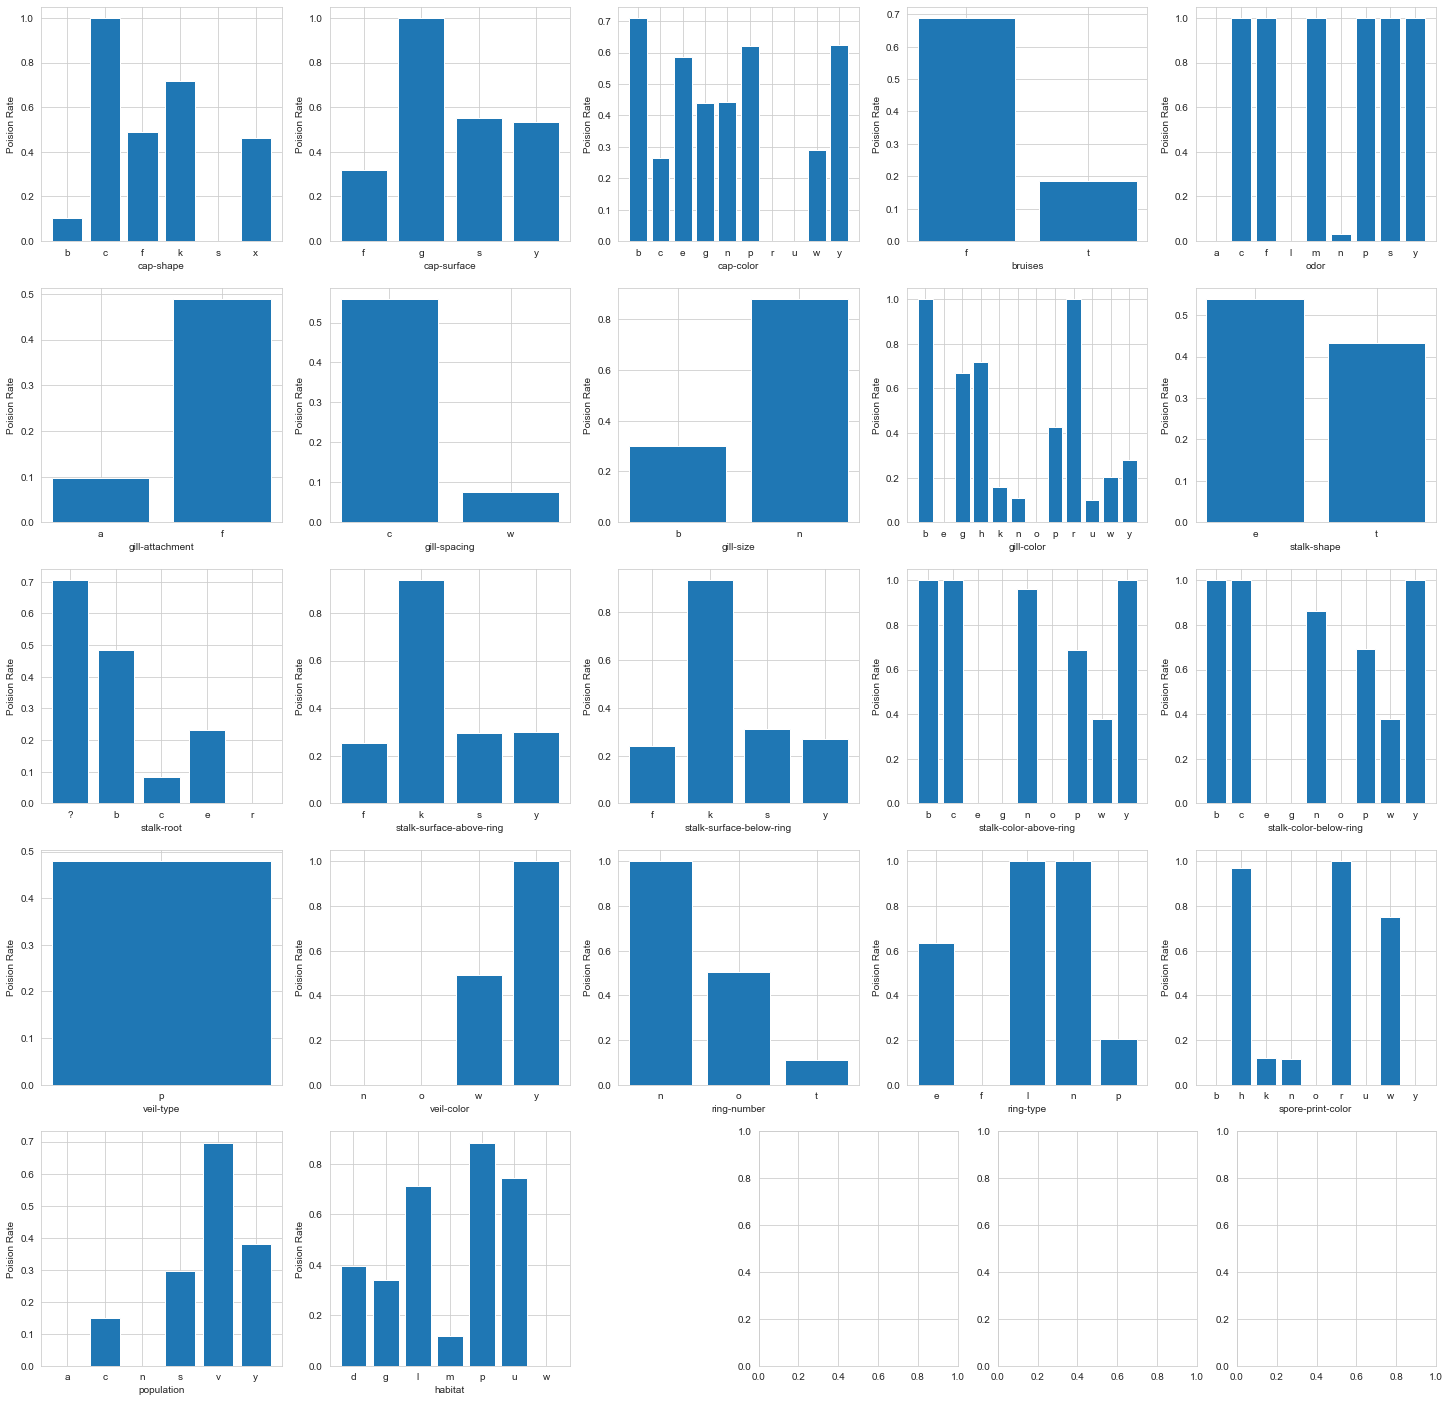

In [81]:
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(5,6, figsize=(25,25))

for i in range(len(train_features.columns)):
    plt.subplot(5,5,i+1)
    grouped = pd.crosstab(train_features.iloc[:,i],train['class'])

    x = grouped.index
    y = grouped['p']/(grouped['e']+grouped['p'])

    plt.xlabel(train_features.columns[i])
    plt.ylabel('Poision Rate')
    plt.bar(x, y)

In [17]:
grouped = pd.crosstab(train.iloc[:,1],train['class'])

In [18]:
grouped = pd.crosstab(train.iloc[:,1],train['class'])
grouped['독버섯'] = grouped['p']/(grouped['e']+grouped['p'])

In [19]:
grouped

class,e,p,독버섯
cap-surface,,,
f,1261,592,0.319482
g,0,1,1.000000
s,914,1117,0.549975
y,1213,1401,0.535960


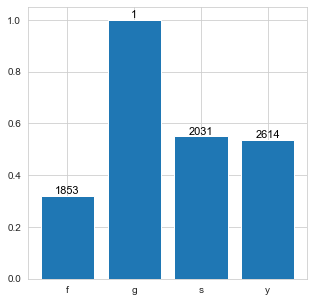

In [20]:
x = grouped['독버섯'].index
y = grouped['독버섯'].values
z = grouped['e']+grouped['p']
plt.rcParams['figure.figsize'] = (5,5)

plt.bar(x,y)

for i, v in enumerate(x):
    plt.text(v, y[i], z[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 11, 
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)


plt.show()


In [21]:
train_features.columns[1]

'cap-surface'

In [22]:
grouped = pd.crosstab(train.iloc[:,1],train['class'])
grouped['e']

cap-surface
f    1261
g       0
s     914
y    1213
Name: e, dtype: int64

<Figure size 360x360 with 0 Axes>

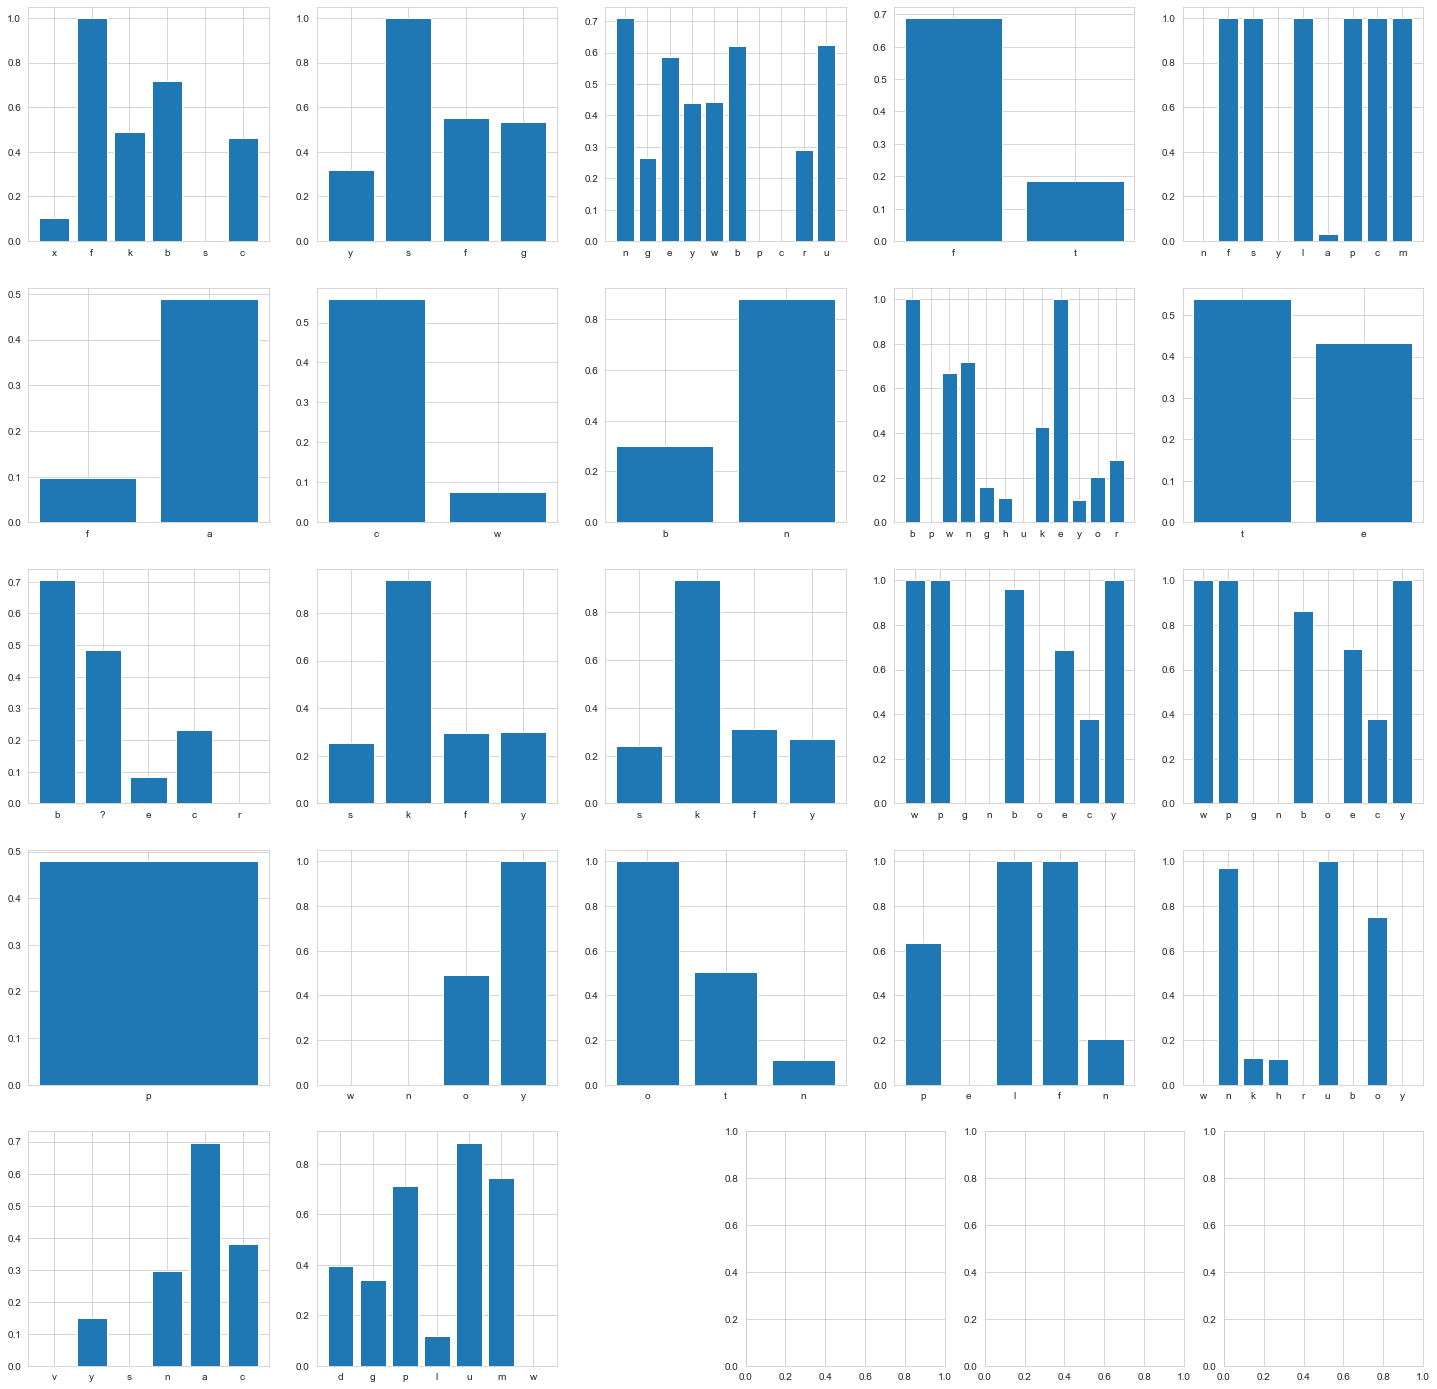

In [23]:
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(5,6, figsize=(25,25))

for i in range(len(train_features.columns)):
    plt.subplot(5,5,i+1)
    grouped = pd.crosstab(train_features.iloc[:,i],train['class'])

    x = train_features[train_features.columns[i]].value_counts().index
    y = grouped['p']/(grouped['p']+grouped['e'])
        
    plt.bar(x, y)
    

In [199]:
z

cap-surface
f    1853
g       1
s    2031
y    2614
dtype: int64

In [174]:
for i in range(22):
    pd.crosstab(train.iloc[:,i],train['class'])

In [104]:
from sklearn.metrics import matthews_corrcoef

for i in range(len(train_features.columns)):
    print(train_features.columns[i], ":", matthews_corrcoef(train_target.values, train_features[train_features.columns[i]]))

cap-shape : 0.0
cap-surface : 0.0
cap-color : -0.02739478109736645
bruises : 0.0
odor : 0.028070302654385544
gill-attachment : 0.0
gill-spacing : 0.0
gill-size : 0.0
gill-color : -0.0054294364148786255
stalk-shape : -0.052147186171984876
stalk-root : 0.05921114197283123
stalk-surface-above-ring : 0.0
stalk-surface-below-ring : 0.0
stalk-color-above-ring : 0.0962737440390514
stalk-color-below-ring : 0.09591369039157345
veil-type : 0.0
veil-color : 0.0
ring-number : 0.0
ring-type : -0.3371376236031901
spore-print-color : 0.0
population : 0.0
habitat : 0.09323352496184989


C:\Users\JH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


<BarContainer object of 11 artists>

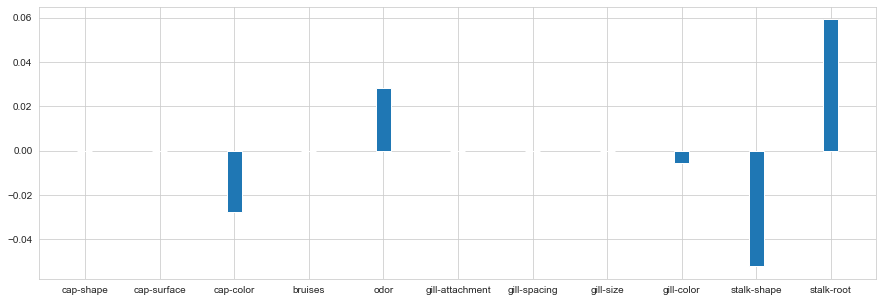

In [153]:
a = train_features.columns[0:11]
b = []

for i in range(11):
    b.append(matthews_corrcoef(train_target.values, train_features[train_features.columns[i]]))

plt.rcParams["figure.figsize"] = (15,5)
plt.bar(a,b, width=0.2)

C:\Users\JH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


<BarContainer object of 11 artists>

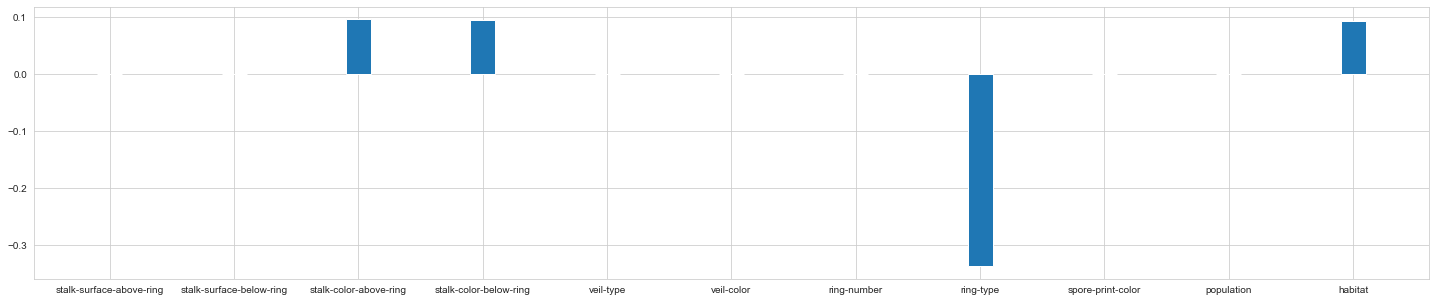

In [161]:
a = train_features.columns[11:22]
b = []
for i in range(11,22):
    b.append(matthews_corrcoef(train_target.values, train_features[train_features.columns[i]]))

plt.rcParams["figure.figsize"] = (25,5)
plt.bar(a,b, width=0.2)